# WEB SCRAPING AND EXPLORATORY DATA ANALYSIS  ON IMDB MOVIES

# Problem  Statement :
To Perform  Data Analysis On IMDB Movies With Respect To Rating.
# Website URL:
### https://www.imdb.com/search/titlecountries=us&title_type=feature&num_votes=10000,&sort=user_rating,desc![image.png](attachment:image.png)

# Libraries Used:

- NumPy
- Pandas
- Matplotlib
- Seaborn
- Requests
- Beautiful Soup

# Steps Involved:
- Web scraping the IMDB Website using  Requests and Beautiful Soup, extracting the required data for analysis.
- Applying Regular Expressions (Regex) on the data to simplify for analysis.
- Using NumPy and Pandas Libraries create Data Frames and Storing  it to IMDB.csv file.
- Using the IMDB.csv we apply visualizations using Matplotlib and Seaborn Libraries.


In [21]:
# Loading required libraries
import numpy as np
import pandas as pd
import re
from pandas import Series
import requests
import bs4
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Scrapping the Web Page
title = []
Year = []
run = []
gen = []
Rate = []
Votes=[]
Gross=[]
Metascore=[]
di=[]


for i in range(1,1001,51):
    URL = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&start={}&ref_=adv_nxt'.format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)   
    
    for x in soup.findAll('div',attrs={'class':'lister-item-content'}):
        name = x.h3.a
        if name is None:
            title.append(np.nan)
        else:
            title.append(name.text)
        year=x.h3.find('span', class_ ='lister-item-year text-muted unbold')
        if year is None:
            Year.append(np.nan)
        else:
            Year.append(year.text)
        run1=x.p.find('span', class_ ='runtime')
        if run1 is None:
            run.append(np.nan)
        else:
            run.append(run1.text)
        gen1=x.p.find('span', class_ ='genre')
        if gen1 is None:
            gen.append(np.nan)
        else:
            gen.append(gen1.text)
        r=x.find('div', class_ ='inline-block ratings-imdb-rating')
        if r is None:
            Rate.append(np.nan)
        else:
            Rate.append(r.text)
        v=x.select_one('p.sort-num_votes-visible > span:-soup-contains("Votes:") + span')
        if v is None:
            Votes.append(np.nan)
        else:
            Votes.append(v.text)
        g=x.select_one('p.sort-num_votes-visible > span:-soup-contains("Gross:") + span')
        if g is None:
            Gross.append(np.nan)
        else:
            Gross.append(g.text)
        M=x.find('div', class_ ='inline-block ratings-metascore')
        if M is None:
            Metascore.append(np.nan)
        else:
            Metascore.append(M.text)
        w=x.find_all('p')[2].text
        if w is None:
            di.append(np.nan)
        else:
            di.append(w)

# Create a DataFrame and save it in CSV file

In [29]:
df = pd.DataFrame({'Movie_Name':title,'Year':Year,'Duration_Min':run,'Genre':gen,'Director':di,'Rating':Rate,'Votes':Votes,'Gross':Gross,'Metascore':Metascore})

In [30]:
df.head(5)

,Movie_Name,Year,Duration_Min,Genre,Director,Rating,Votes,Gross,Metascore
0,Kantara,(2022),148 min,"\nAction, Adventure, Drama",\n Director:\nRishab Shetty\n| \n Stars:...,\n\n9.6\n,"11,953",NaN,NaN
1,The Shawshank Redemption,(1994),142 min,\nDrama,\n Director:\nFrank Darabont\n| \n Stars...,\n\n9.3\n,"2,649,220",$28.34M,\n81 \n Metascore\n
2,Hababam Sinifi,(1975),87 min,"\nComedy, Drama",\n Director:\nErtem Egilmez\n| \n Stars:...,\n\n9.2\n,"40,727",NaN,NaN
3,The Godfather,(1972),175 min,"\nCrime, Drama",\n Director:\nFrancis Ford Coppola\n| \n ...,\n\n9.2\n,"1,836,415",$134.97M,\n100 \n Metascore\n
4,777 Charlie,(2022),136 min,"\nAdventure, Comedy, Drama",\n Director:\nKiranraj K\n| \n Stars:\nR...,\n\n9.0\n,"25,270",NaN,NaN
5,Aynabaji,(2016),147 min,"\nCrime, Mystery, Thriller",\n Director:\nAmitabh Reza Chowdhury\n| \n ...,\n\n9.0\n,"27,005",NaN,NaN
6,Kimetsu no Yaiba: Tsuzumi Yashiki Hen,(2021),87 min,"\nAnimation, Action, Fantasy",\n Director:\nHaruo Sotozaki\n,\n\n9.0\n,"12,280",NaN,NaN
7,The Dark Knight,(2008),152 min,"\nAction, Crime, Drama",\n Director:\nChristopher Nolan\n| \n St...,\n\n9.0\n,"2,621,217",$534.86M,\n84 \n Metascore\n
8,The Lord of the Rings: The Return of the King,(2003),201 min,"\nAction, Adventure, Drama",\n Director:\nPeter Jackson\n| \n Stars:...,\n\n9.0\n,"1,825,009",$377.85M,\n94 \n Metascore\n
9,Schindler's List,(1993),195 min,"\nBiography, Drama, History",\n Director:\nSteven Spielberg\n| \n Sta...,\n\n9.0\n,"1,342,634",$96.90M,\n94 \n Metascore\n


# Data Cleansing:

In [31]:
df['Year'] = df['Year'].str.replace('(','',regex=True).str.replace(')','',regex=True).str.replace('[a-zA-Z ]','',regex=True)

In [32]:
df['Director']=df['Director'].replace('[\n|]','',regex=True)

In [33]:
a=df['Director'].str.split(':',expand=True)
df['Director']=a[1]
df['Stars']=a[2]

In [34]:
a=df['Director'].str.split('Stars',expand=True)
df.drop(columns=["Director"],inplace=True)
df["Director"]=a[0]

In [35]:
df['Duration_Min'] = df['Duration_Min'].str.replace(' min','')

In [36]:
df['Genre'] = df['Genre'].replace(r'\n','',regex=True).replace(r'            ','',regex=True)

In [37]:
df['Rating'] = df['Rating'].replace(r'\n','',regex=True)

In [38]:
df['Votes'] = df['Votes'].replace(r',','',regex=True)

In [39]:
df['Gross']=df['Gross'].str.replace('[$a-zA-Z]','',regex=True)

In [40]:
df['Metascore']=df['Metascore'].replace('\n','',regex=True).replace('[a-zA-Z]','',regex=True)

In [41]:
neworder = ['Movie_Name','Year','Duration_Min','Director','Stars','Genre','Rating','Votes','Gross','Metascore']
df=df.reindex(columns=neworder)

# Final Dataframe

In [42]:
df

,Movie_Name,Year,Duration_Min,Director,Stars,Genre,Rating,Votes,Gross,Metascore
0,Kantara,2022,148,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...","Action, Adventure, Drama",9.6,11953,NaN,NaN
1,The Shawshank Redemption,1994,142,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,9.3,2649220,28.34,81
2,Hababam Sinifi,1975,87,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Comedy, Drama",9.2,40727,NaN,NaN
3,The Godfather,1972,175,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Crime, Drama",9.2,1836415,134.97,100
4,777 Charlie,2022,136,Kiranraj K,"Rakshit Shetty, Charlie, Sangeetha Sringeri, R...","Adventure, Comedy, Drama",9.0,25270,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
994,The Day of the Jackal,1973,143,Fred Zinnemann,"Edward Fox, Terence Alexander, Michel Auclair,...","Crime, Drama, Thriller",7.8,41291,16.06,80
995,Le charme discret de la bourgeoisie,1972,102,Luis Buñuel,"Fernando Rey, Delphine Seyrig, Paul Frankeur, ...",Comedy,7.8,43293,0.20,93
996,Cabaret,1972,124,Bob Fosse,"Liza Minnelli, Michael York, Helmut Griem, Joe...","Drama, Music, Musical",7.8,55356,42.77,80
997,"Aguirre, der Zorn Gottes",1972,95,Werner Herzog,"Klaus Kinski, Ruy Guerra, Helena Rojo, Del Negro","Action, Adventure, Biography",7.8,57450,NaN,NaN


# Saving the Dataframe to IMDB.csv

In [ ]:
df.to_csv('IMDB.csv', index = False)

# Reading data from IMDB.csv

In [3]:
df=pd.read_csv('IMDB.csv')

In [48]:
df.head(5)

,Movie_Name,Year,Duration_Min,Director,Stars,Rating,Votes,Gross,Metascore,Genre
1,The Shawshank Redemption,1994,142,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2649220,28.34,81.0,Drama
3,The Godfather,1972,175,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",9.2,1836415,134.97,100.0,Crime
3,The Godfather,1972,175,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",9.2,1836415,134.97,100.0,Drama
7,The Dark Knight,2008,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2621217,534.86,84.0,Action
7,The Dark Knight,2008,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2621217,534.86,84.0,Crime


# Checking for null values present in the data

In [ ]:
df.isnull().sum()

In [5]:
Missing=df.isnull().sum() * 100/ len(df)
Missing

Movie_Name       0.000000
Year             0.000000
Duration_Min     0.000000
Director         0.000000
Stars            0.300300
Genre            0.000000
Rating           0.000000
Votes            0.000000
Gross           35.935936
Metascore       37.537538
dtype: float64

# Handling null values

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
a=df.duplicated().any()
print('Duplicate Values Found:',a)

Duplicate Values Found: False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 1 to 998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_Name    534 non-null    object 
 1   Year          534 non-null    int64  
 2   Duration_Min  534 non-null    int64  
 3   Director      534 non-null    object 
 4   Stars         534 non-null    object 
 5   Genre         534 non-null    object 
 6   Rating        534 non-null    float64
 7   Votes         534 non-null    int64  
 8   Gross         534 non-null    float64
 9   Metascore     534 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 45.9+ KB


In [51]:
df.describe(include='all')

,Movie_Name,Year,Duration_Min,Director,Stars,Rating,Votes,Gross,Metascore,Genre
count,1339,1339.000000,1339.000000,1339,1339,1339.000000,1.339000e+03,1339.000000,1339.000000,1339
unique,534,NaN,NaN,333,533,NaN,NaN,NaN,NaN,32
top,Willy Wonka & the Chocolate Factory,NaN,NaN,Martin Scorsese,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",NaN,NaN,NaN,NaN,Drama
freq,3,NaN,NaN,24,6,NaN,NaN,NaN,NaN,231
mean,NaN,1994.138910,126.908140,NaN,NaN,8.059746,4.390850e+05,83.588954,79.094847,NaN
std,NaN,21.080424,29.258751,NaN,NaN,0.258893,4.370293e+05,132.384556,12.197765,NaN
min,NaN,1925.000000,75.000000,NaN,NaN,7.800000,1.063300e+04,0.000000,33.000000,NaN
25%,NaN,1984.000000,106.000000,NaN,NaN,7.900000,9.873500e+04,4.030000,71.000000,NaN
50%,NaN,2001.000000,122.000000,NaN,NaN,8.000000,2.951770e+05,30.000000,80.000000,NaN
75%,NaN,2010.000000,141.000000,NaN,NaN,8.200000,6.635965e+05,108.215000,88.000000,NaN


# Movies released yearwise from 2010

C:\Users\arava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

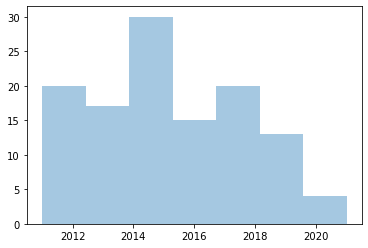

In [9]:
df1=df[df.Year>2010]

sns.distplot( x=df1['Year'], hist=True, kde=False, rug=False)

# Distribution of Ratings

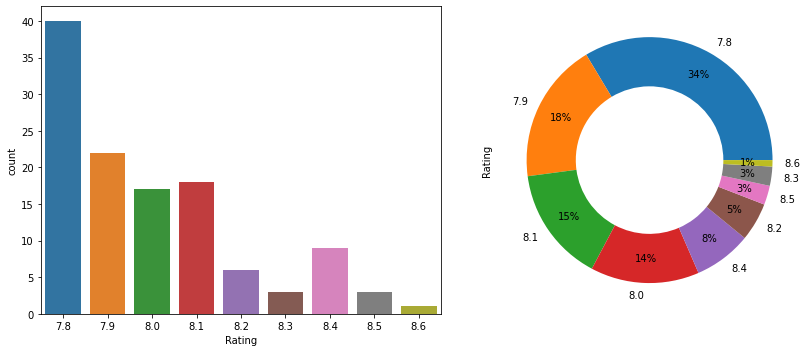

In [10]:
rating_counts = df1["Rating"].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=df1["Rating"])
plt.subplot(1,2,2)   
df1["Rating"].value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.tight_layout()
plt.show()

# Top 20 Directors who had directed more movies

In [11]:
dir_counts = df1.Director.value_counts()[:20]
dir_counts

Denis Villeneuve                 4
Anthony Russo, Joe Russo         4
Christopher Nolan                3
Taika Waititi                    3
Wes Anderson                     3
Nuri Bilge Ceylan                3
Sam Mendes                       2
Peter Jackson                    2
Bryan Singer                     2
Richard Linklater                2
Hirokazu Koreeda                 2
James Mangold                    2
Martin Scorsese                  2
Stephen Chbosky                  2
Damien Chazelle                  2
Quentin Tarantino                2
Jon Watts                        1
Jean-Marc Vallée                 1
Ciro Guerra                      1
Paul King                        1
Name: Director, dtype: int64

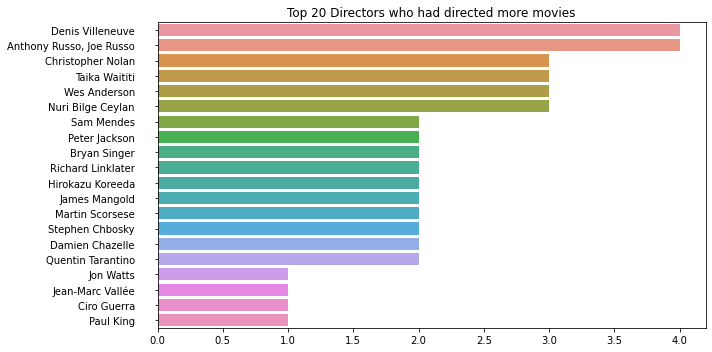

In [37]:
dir_counts = df1.Director.value_counts()[:20]
plt.figure(figsize=(10,5))
plt.title('Top 20 Directors who had directed more movies')
sns.barplot(y=dir_counts.index,x=dir_counts.values)
plt.tight_layout()
plt.show()

# Genres In Which More Movies are Produced

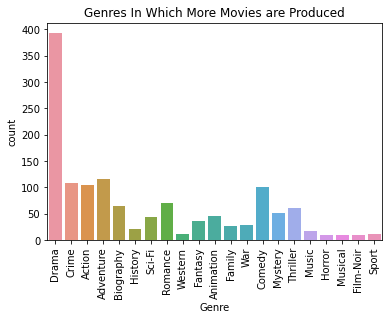

In [12]:
li=[]
for i in df['Genre']:
    li.append(i.split(','))
g=[]
for i in li:
    for y in i:
        g.append(y)

df3=pd.DataFrame({'Genre':g})
df3['Genre']=df3['Genre'].replace(r'            ','',regex=True).replace(r' ','',regex=True)

sns.countplot(x=df3["Genre"])
plt.title('Genres In Which More Movies are Produced')
plt.xticks(rotation = 90)
plt.show()

In [13]:
dt = df[['Genre','Movie_Name','Year','Duration_Min','Director','Stars','Rating','Votes','Gross','Metascore']]

In [14]:
s = df['Genre'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genre'
del dt['Genre']
df = dt.join(s)

In [47]:
df1 = df[df['Rating']>=7]
df1['Genre']=df1['Genre'].str.replace(r' ','',regex=True)

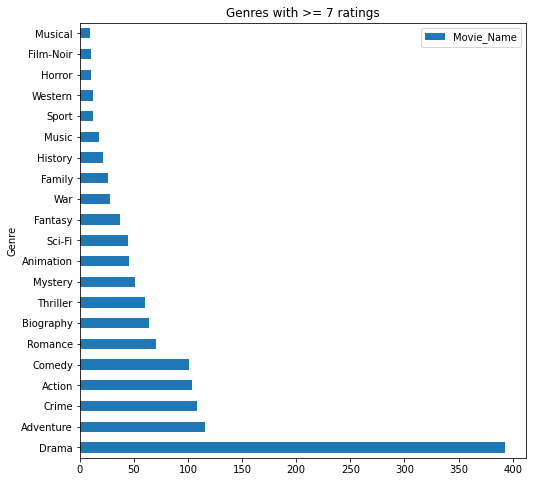

In [46]:
df2 = (pd.DataFrame(df1.groupby('Genre').Movie_Name.nunique())).sort_values('Movie_Name', ascending=False )
df2[['Movie_Name']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(8, 8));
plt.savefig('Rating given Genrewise.png',
             bbox_inches ="tight",
             pad_inches = 1,
             transparent = True,
             facecolor ="w",
             edgecolor ='w',
             orientation ='landscape')

In [33]:
df

,Movie_Name,Year,Duration_Min,Director,Stars,Rating,Votes,Gross,Metascore,Genre
1,The Shawshank Redemption,1994,142,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2649220,28.34,81.0,Drama
3,The Godfather,1972,175,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",9.2,1836415,134.97,100.0,Crime
3,The Godfather,1972,175,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",9.2,1836415,134.97,100.0,Drama
7,The Dark Knight,2008,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2621217,534.86,84.0,Action
7,The Dark Knight,2008,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2621217,534.86,84.0,Crime
...,...,...,...,...,...,...,...,...,...,...
996,Cabaret,1972,124,Bob Fosse,"Liza Minnelli, Michael York, Helmut Griem, Joe...",7.8,55356,42.77,80.0,Music
996,Cabaret,1972,124,Bob Fosse,"Liza Minnelli, Michael York, Helmut Griem, Joe...",7.8,55356,42.77,80.0,Musical
998,Willy Wonka & the Chocolate Factory,1971,100,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...",7.8,201277,4.00,67.0,Family
998,Willy Wonka & the Chocolate Factory,1971,100,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...",7.8,201277,4.00,67.0,Fantasy


# Gross Collections Of Movies Yearwise In Millions

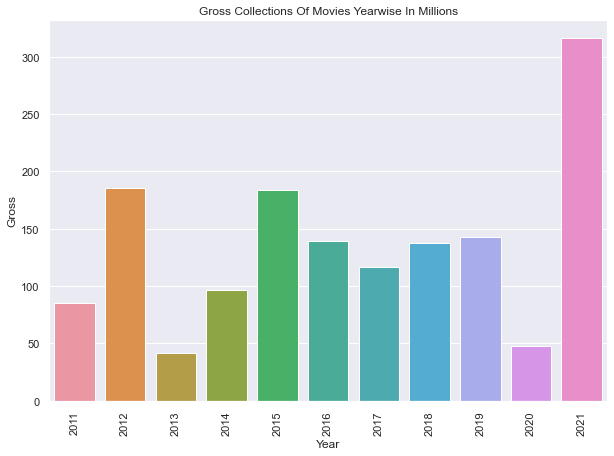

In [286]:
sns.barplot(x='Year',y='Gross',data=df1,ci=None)
plt.title('Gross Collections Of Movies Yearwise In Millions')
sns.set(rc={'figure.figsize':(10.0,7.0)})
plt.xticks(rotation = 90)
plt.show()

# Top 20 Movies  With Highest Ratings

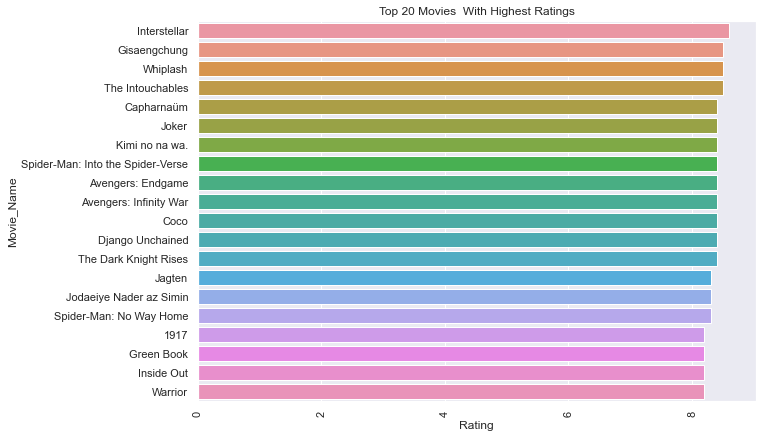

In [38]:
df2=df1.nlargest(20,'Rating')[['Movie_Name','Rating']].set_index('Movie_Name')
plt.title('Top 20 Movies  With Highest Ratings')
sns.barplot(x='Rating',y=df2.index,data=df2,ci=None)
sns.set(rc={'figure.figsize':(10.0,7.0)})
plt.xticks(rotation = 90)
plt.show()

# Top 20 Directors With Highest Ratings

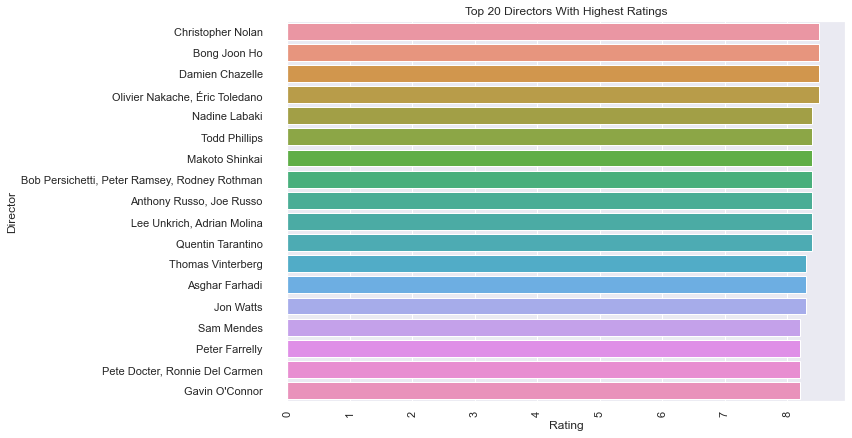

In [39]:
df2=df1.nlargest(20,'Rating')[['Director','Rating']].set_index('Director')
plt.title('Top 20 Directors With Highest Ratings')
sns.barplot(x='Rating',y=df2.index,data=df2,ci=None)
sns.set(rc={'figure.figsize':(10.0,7.0)})
plt.xticks(rotation = 90)
plt.show()

# Top 20 Movies With Highest Votes

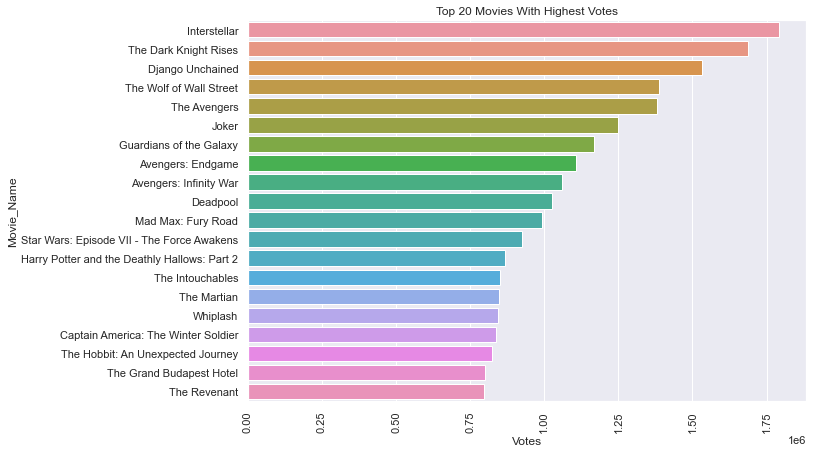

In [289]:
df2=df1.nlargest(20,'Votes')[['Movie_Name','Votes']].set_index('Movie_Name')
plt.title('Top 20 Movies With Highest Votes')
sns.barplot(x='Votes',y=df2.index,data=df2,ci=None)
sns.set(rc={'figure.figsize':(10.0,7.0)})
plt.xticks(rotation = 90)
plt.show()

# Top 10 Highest Rated Movies With Director Names

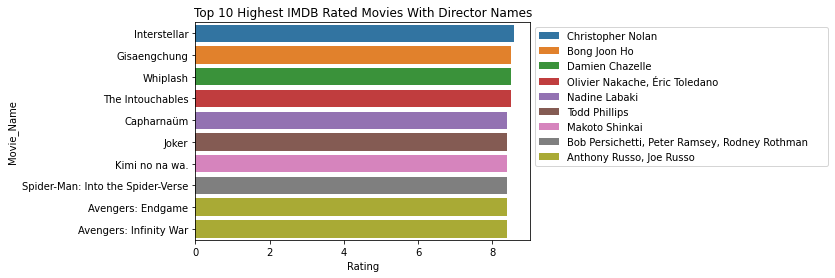

In [65]:
df2=df1.nlargest(10,'Rating')[['Movie_Name','Rating','Director']].set_index('Movie_Name')
plt.title('Top 10 Highest IMDB Rated Movies With Director Names')
sns.barplot(x='Rating',y=df2.index,data=df2,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)

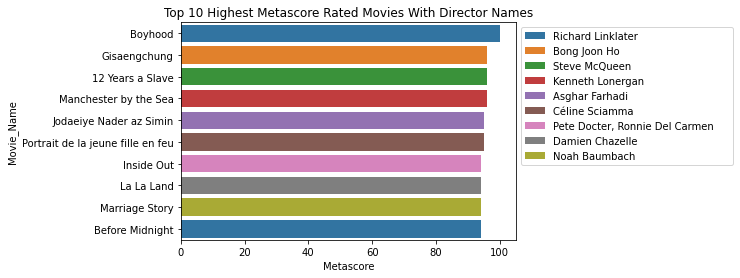

In [64]:
df2=df1.nlargest(10,'Metascore')[['Movie_Name','Metascore','Director']].set_index('Movie_Name')
plt.title('Top 10 Highest Metascore Rated Movies With Director Names')
sns.barplot(x='Metascore',y=df2.index,data=df2,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)